<a href="https://colab.research.google.com/github/ihadzic1/Analysis-of-Nutrition-and-Caloric-Intake-Using-Image-Classification-Models/blob/fruit-detection/Analysis-of-Nutrition-and-Caloric-Intake-Using-Image-Classification-Models" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install required libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
#Import the dataset from roboflow with the following code
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gbnE2mI51TkywHQXfMAH")
project = rf.workspace("foodobjectdetection-gbrbd").project("foodobjectdetectiondataset")
version = project.version(7)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FoodObjectDetectionDataset-7 in yolov8:: 100%|██████████| 6302/6302 [00:01<00:00, 5166.07it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


model = YOLO("yolov8x.pt")  # Using YOLOv8x as base (transfer learning)
dataset_location = dataset.location # Set dataset location

model.train(
    data=f"{dataset_location}/data.yaml",
    epochs=20,         # Set number of epochs
    imgsz=640,        # Set image size
    batch=16,        # Determine batch size
    device=0        # GPU = 0; use 'cpu' if no GPU
)


100%|██████████| 131M/131M [00:00<00:00, 221MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/FoodObjectDetectionDataset-7/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

100%|██████████| 755k/755k [00:00<00:00, 83.5MB/s]

Overriding model.yaml nc=80 with nc=24

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           


  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 150MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1152.6±499.8 MB/s, size: 40.6 KB)


train: Scanning /content/FoodObjectDetectionDataset-7/train/labels... 2700 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2700/2700 [00:01<00:00, 2308.02it/s]

train: New cache created: /content/FoodObjectDetectionDataset-7/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 521.3±284.1 MB/s, size: 37.9 KB)


val: Scanning /content/FoodObjectDetectionDataset-7/valid/labels... 267 images, 0 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<00:00, 1278.93it/s]

val: New cache created: /content/FoodObjectDetectionDataset-7/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000357, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      11.7G      1.269      2.273      1.558        110        640: 100%|██████████| 169/169 [03:41<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]

                   all        267        893      0.499      0.549      0.489      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      12.3G      1.221      1.571      1.517        122        640: 100%|██████████| 169/169 [03:40<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893       0.56      0.502      0.469      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      12.4G      1.193      1.567      1.497         65        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893      0.532      0.545       0.57      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      12.5G      1.161      1.439      1.481         82        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]

                   all        267        893      0.543      0.592       0.57      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      12.4G      1.131      1.317      1.458         70        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]

                   all        267        893      0.657      0.723      0.691      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      12.2G      1.087      1.199      1.416         87        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.566      0.752      0.657      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.5G      1.059      1.093      1.399         63        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.784      0.724       0.73      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.5G      1.038      1.014      1.375         95        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.671      0.785      0.716      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      12.4G      1.007     0.9365      1.361         68        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.716      0.773       0.74      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      12.1G          1     0.8966      1.347        130        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893      0.589       0.89      0.729      0.568


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      12.4G     0.9684     0.8399      1.405        139        640: 100%|██████████| 169/169 [03:39<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.649      0.886      0.787      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      12.5G      0.954     0.7683      1.389         35        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.00it/s]

                   all        267        893      0.759      0.767       0.77      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      12.4G     0.9331     0.6976      1.364         41        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.628      0.842      0.767      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.1G     0.9175     0.6512       1.35         34        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.639      0.867      0.766        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      12.5G     0.8872     0.6269      1.331        136        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.646      0.842      0.773      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.5G     0.8728     0.5998      1.311         45        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.652      0.844      0.772      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      12.5G     0.8425     0.5393      1.294         32        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893      0.674      0.886      0.809      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      12.2G     0.8096     0.5176      1.254         46        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]

                   all        267        893      0.675      0.875        0.8      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.5G     0.7745     0.4698      1.229         34        640: 100%|██████████| 169/169 [03:38<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893        0.7      0.842      0.802      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      12.5G     0.7532     0.4562      1.221         40        640: 100%|██████████| 169/169 [03:38<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.02it/s]

                   all        267        893      0.724      0.826       0.82      0.657



20 epochs completed in 1.324 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,146,680 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


                   all        267        893      0.725      0.827      0.819      0.657
                 apple         78        163      0.834      0.926      0.921      0.759
                banana        134        225      0.954       0.96      0.981      0.752
                cherry         18         54      0.835      0.963      0.936      0.711
          dragon fruit          6          6      0.381        0.5      0.359      0.266
                  kiwi         10         34      0.648          1      0.938      0.752
                 mango          4          8      0.378      0.875      0.836      0.725
                orange         85        149      0.951      0.658      0.933       0.79
                  pear         43         43      0.941          1      0.979      0.873
             pineapple         56         56      0.973      0.982      0.972      0.834
            strawberry         15         74      0.945      0.933      0.961      0.789
           sugar appl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  6,  7, 11, 14, 15, 16, 17, 21, 22, 23])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7902a1a4cbd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [6]:

print("\n--- Evaluation Metrics ---")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision (mean): {metrics.box.mp:.4f}")
print(f"Recall (mean): {metrics.box.mr:.4f}")

class_names = model.names
num_metrics = len(metrics.box.p)

print("\nPer-Class Metrics:")
print(f"{'Class':15s} | {'Precision':>9} | {'Recall':>7} | {'AP@0.5':>7} | {'AP@0.5:0.95':>12}")
print("-" * 60)

for i in range(num_metrics):
    name = class_names[i]
    p = metrics.box.p[i]
    r = metrics.box.r[i]
    ap50 = metrics.box.ap50[i]
    ap = metrics.box.ap[i]
    print(f"{name:15s} | {p:.2f}       | {r:.2f}   | {ap50:.2f}   | {ap:.2f}")


--- Evaluation Metrics ---
mAP@0.5: 0.8146
mAP@0.5:0.95: 0.6540
Precision (mean): 0.7206
Recall (mean): 0.8262

Per-Class Metrics:
Class           | Precision |  Recall |  AP@0.5 |  AP@0.5:0.95
------------------------------------------------------------
apple           | 0.83       | 0.93   | 0.92   | 0.76
avocado         | 0.95       | 0.96   | 0.98   | 0.75
banana          | 0.83       | 0.96   | 0.94   | 0.71
blackberry      | 0.34       | 0.50   | 0.31   | 0.23
blueberry       | 0.64       | 1.00   | 0.94   | 0.75
cevap           | 0.38       | 0.88   | 0.84   | 0.72
cherry          | 0.95       | 0.66   | 0.93   | 0.79
dragon fruit    | 0.94       | 1.00   | 0.98   | 0.87
grape           | 0.97       | 0.98   | 0.97   | 0.83
grapefruit      | 0.95       | 0.93   | 0.96   | 0.79
half pita bread | 0.25       | 0.33   | 0.32   | 0.27
kiwi            | 0.60       | 0.78   | 0.69   | 0.36


invalid value encountered in divide


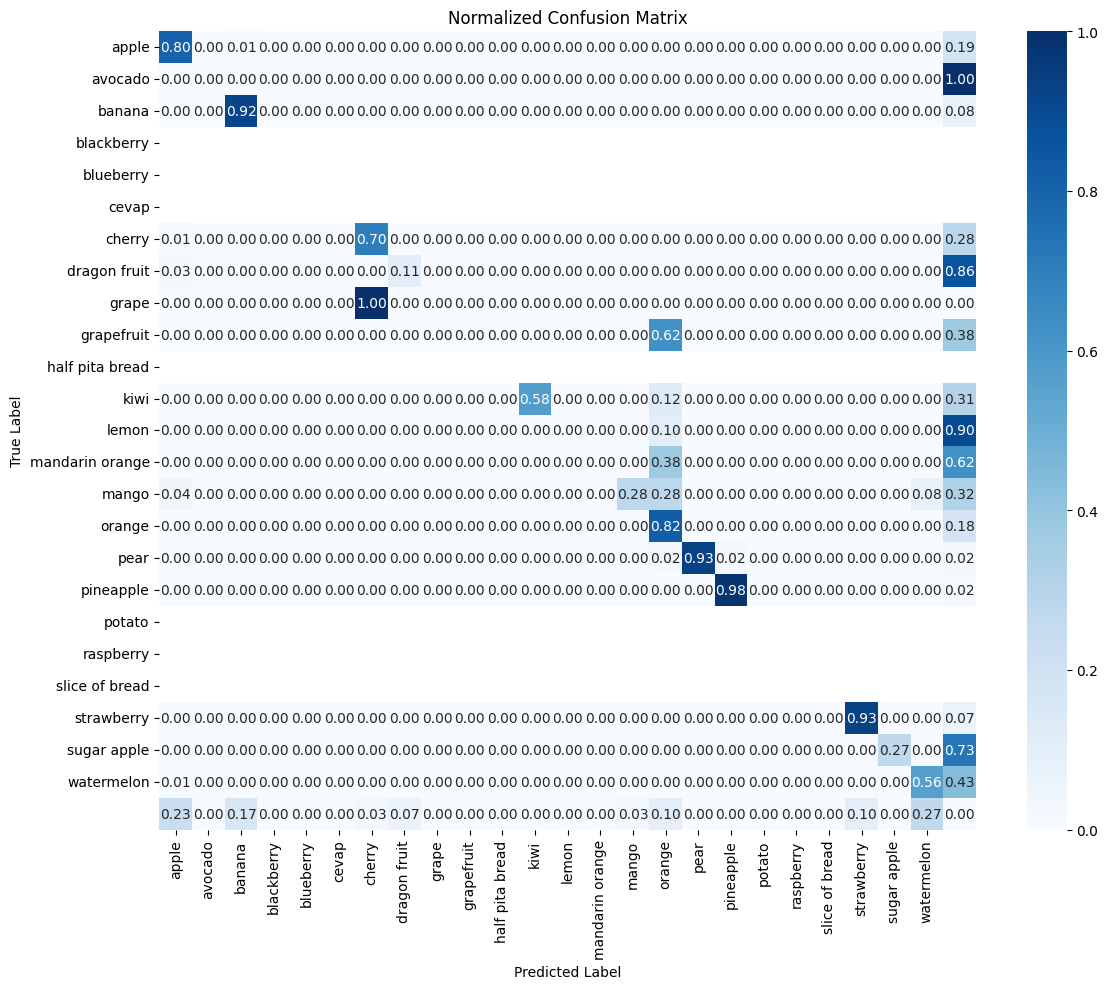

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Prepare lists for true and predicted class indices
true_classes = []
pred_classes = []

# Confusion matrix
cm = metrics.confusion_matrix.matrix

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=model.names.values(),
            yticklabels=model.names.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

In [9]:
#Zip the model
!zip -r best_model_x.zip runs/detect/train/weights/

#Download the model
from google.colab import files
files.download("best_model_x.zip")


  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 8%)
  adding: runs/detect/train/weights/last.pt (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>